Problem statement: In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months

In [8]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [14]:
dta = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Time_Series_Forecasting/Train_SU63ISt.csv")

In [15]:
dta.head(10)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [16]:
dta = dta.set_index('Datetime')
del dta['ID']

In [17]:
dta

,Count
Datetime,
25-08-2012 00:00,8
25-08-2012 01:00,2
25-08-2012 02:00,6
25-08-2012 03:00,2
25-08-2012 04:00,2
...,...
25-09-2014 19:00,868
25-09-2014 20:00,732
25-09-2014 21:00,702


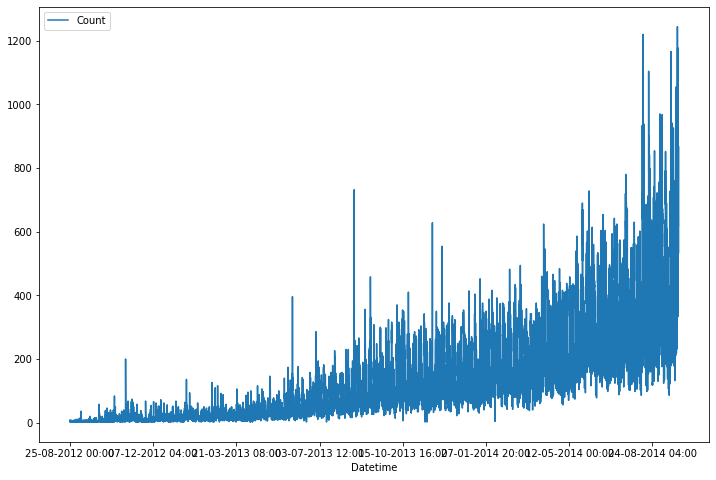

In [18]:
# show plots in the notebook
%matplotlib inline
dta.plot(figsize=(12,8));

In [19]:
sm.stats.durbin_watson(dta)

array([0.03928653])

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


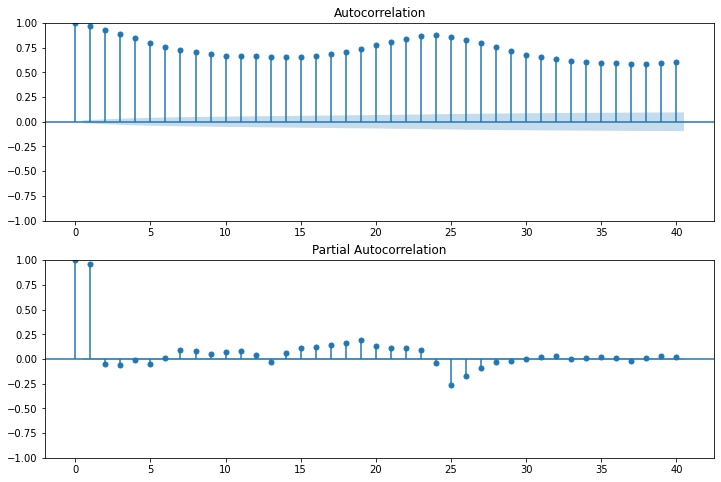

In [20]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

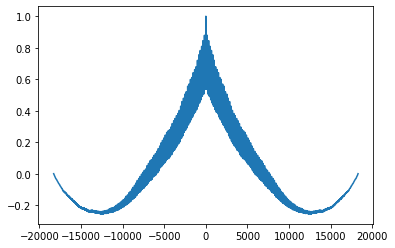

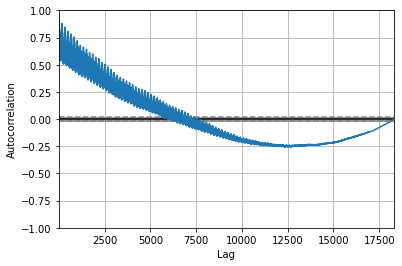

In [22]:
from pandas.plotting import autocorrelation_plot
# show plots in the notebook
%matplotlib inline
dta['Count_2'] = dta['Count']
dta['Count_2'] = (dta['Count_2'] - dta['Count_2'].mean()) / (dta['Count_2'].std())
plt.acorr(dta['Count_2'],maxlags = len(dta['Count_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(dta['Count'])
plt.show()

In [79]:
dta

,Count
Datetime,
25-08-2012 00:00,8
25-08-2012 01:00,2
25-08-2012 02:00,6
25-08-2012 03:00,2
25-08-2012 04:00,2
...,...
25-09-2014 19:00,868
25-09-2014 20:00,732
25-09-2014 21:00,702


In [78]:
del dta['Count_2']

In [177]:
arma_mod20 = sm.tsa.ARIMA(dta['Count'], order=(4,2,2)).fit()
print(arma_mod20.params)

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic 

ar.L1       -0.966444
ar.L2        0.071757
ar.L3        0.035159
ar.L4       -0.003320
ma.L1       -0.001499
ma.L2       -0.998501
sigma2    1673.624222
dtype: float64


In [178]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

187647.94356467627 187702.64080180734 187665.9167483373


In [179]:
sm.stats.durbin_watson(arma_mod20.resid.values)

1.9998583311851514

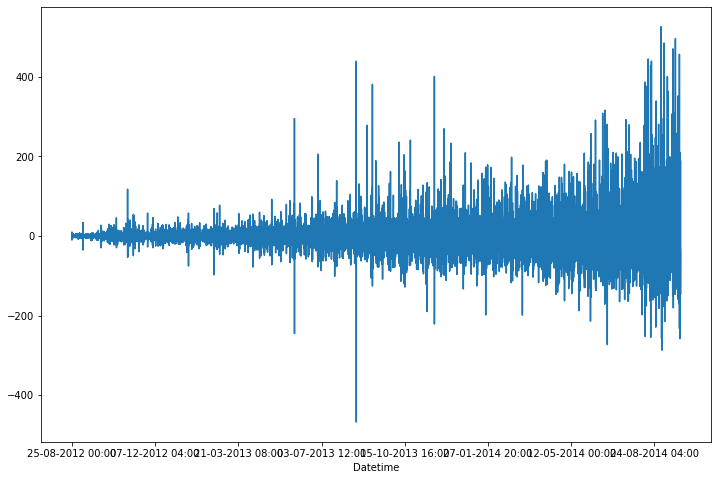

In [180]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [181]:
resid20 = arma_mod20.resid
stats.normaltest(resid20)


NormaltestResult(statistic=8878.808870714778, pvalue=0.0)

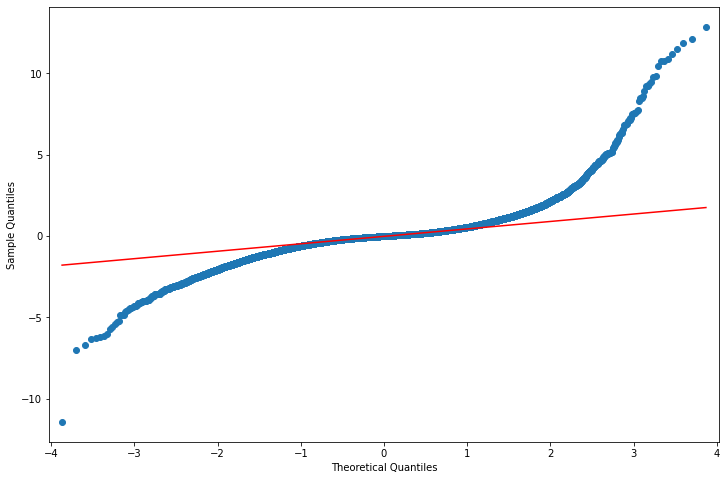

In [182]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


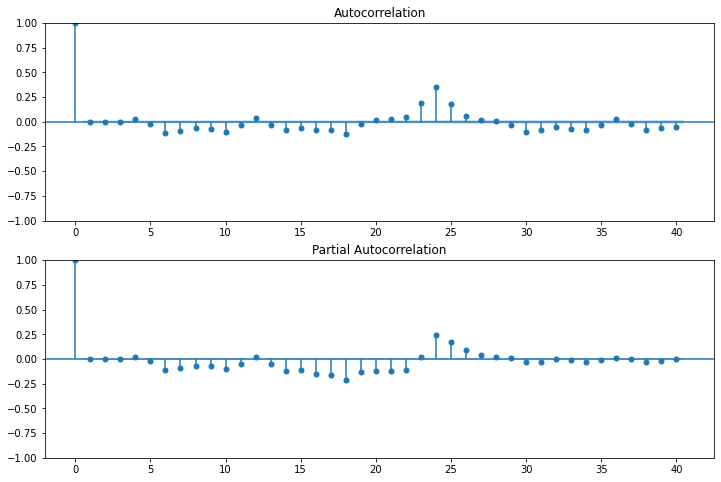

In [183]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

In [184]:
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,43), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC            Q       Prob(>Q)
lag                                       
1.0   0.000044     0.000036   9.952147e-01
2.0  -0.000976     0.017474   9.913008e-01
3.0  -0.000848     0.030614   9.985884e-01
4.0   0.024610    11.110063   2.535451e-02
5.0  -0.021402    19.489974   1.557217e-03
6.0  -0.111590   247.317426   1.535135e-50
7.0  -0.088556   390.804647   2.234399e-80
8.0  -0.063789   465.260971   1.983011e-95
9.0  -0.072942   562.620979  2.189429e-115
10.0 -0.104561   762.694802  2.150638e-157
11.0 -0.037408   788.303917  6.145868e-162
12.0  0.038426   815.327450  8.542186e-167
13.0 -0.030443   832.290660  1.670213e-169
14.0 -0.085674   966.642820  2.237052e-197
15.0 -0.067689  1050.511675  1.995095e-214
16.0 -0.081139  1171.031378  2.450872e-239
17.0 -0.080742  1290.381007  5.343924e-264
18.0 -0.123746  1570.735259   0.000000e+00
19.0 -0.017669  1576.451249   0.000000e+00
20.0  0.016057  1581.171840   0.000000e+00
21.0  0.029569  1597.181102   0.000000e+00
22.0  0.049

In [185]:
predict_sunspots20 = arma_mod20.predict('25-01-2014 23:00', '25-09-2014 23:00', dynamic=True)
print(predict_sunspots20)

Datetime
25-01-2014 23:00    149.455984
26-01-2014 00:00    151.439240
26-01-2014 01:00    150.117760
26-01-2014 02:00    151.479643
26-01-2014 03:00    150.161489
                       ...    
25-09-2014 19:00    217.345357
25-09-2014 20:00    217.615319
25-09-2014 21:00    217.368317
25-09-2014 22:00    217.638134
25-09-2014 23:00    217.391278
Name: predicted_mean, Length: 5833, dtype: float64


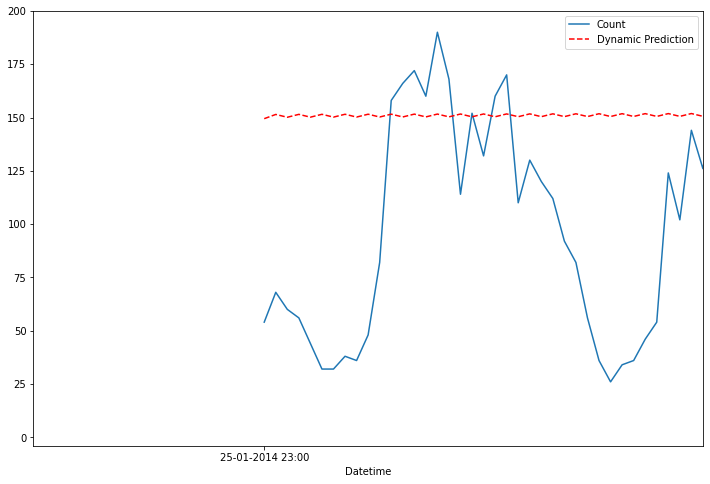

In [186]:
ax = dta.loc['25-08-2013 23:00':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

In [187]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [188]:
print("MFE = ", mean_forecast_err(dta.Count, predict_sunspots20))
print("MAE = ", mean_absolute_err(dta.Count, predict_sunspots20))

MFE =  111.42668760399336
MAE =  0.6118484392547947
